In [35]:
%matplotlib inline
from pygsm import GlobalSkyModel2016
from pygsm import GlobalSkyModel
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from pkg_resources import resource_filename
GSM2016_FILEPATH = resource_filename("pygsm", "gsm2016_components.h5")
GSM_FILEPATH = resource_filename("pygsm", "gsm_components.h5")

In [37]:
GSM2016_FILEPATH, GSM_FILEPATH

('/Users/JianshuLi/Library/Caches/Python-Eggs/pygsm-2.0.0-py2.7.egg-tmp/pygsm/gsm2016_components.h5',
 '/Users/JianshuLi/Library/Caches/Python-Eggs/pygsm-2.0.0-py2.7.egg-tmp/pygsm/gsm_components.h5')

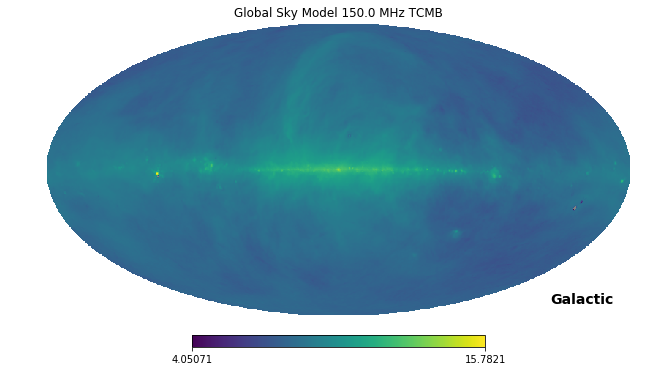

In [54]:
gsm_2016 = GlobalSkyModel2016(freq_unit='MHz')
gsm_2016.generate(150)
gsm_2016.view(logged=True)


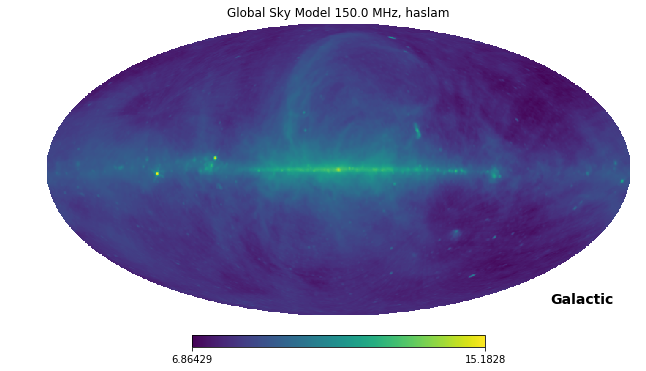

In [55]:
# Compare to 2008 De-Olivera Costa version
gsm_2008 = GlobalSkyModel(freq_unit='MHz')
gsm_2008.generate(150)
gsm_2008.view(logged=True)

In [ ]:
# gsm_2016.write_fits("gsm_500mhz.fits")

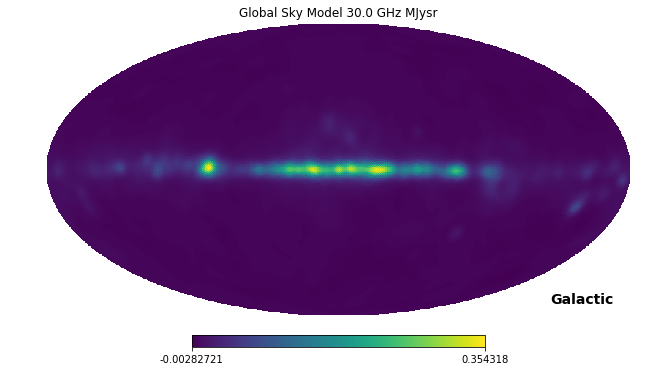

In [40]:
gsm = GlobalSkyModel2016(freq_unit='GHz', unit='MJysr', resolution='low')
gsm.generate(30) # Generate at 30 GHz
gsm.view(logged=False)

(10, 12582912)


Text(0,0.5,u'Temperature [K]')

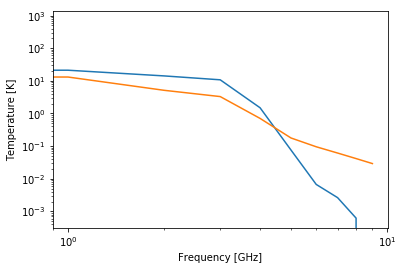

In [41]:
gsm = GlobalSkyModel2016(freq_unit='GHz')
freqs = np.linspace(0.1, 4, 10)
map_cube = gsm.generate(freqs)

print map_cube.shape
plt.loglog(map_cube[:,100])  # Random pixel
plt.loglog(map_cube[:,12345]) # Another random pixel
plt.xlabel("Frequency [GHz]")
plt.ylabel("Temperature [K]")


In [45]:
from pygsm import GSMObserver2016, GSMObserver
from datetime import datetime

# Setup observatory location - in this case, Parkes Australia
# (latitude, longitude, elevation) = ('-32.998370', '148.263659', 100)
(latitude, longitude, elevation) = ('-30.72152', '21.428305555', 0)
ov = GSMObserver2016()
ov.lon = longitude
ov.lat = latitude
ov.elev = elevation
ov.date = datetime(2000, 1, 1, 23, 0)

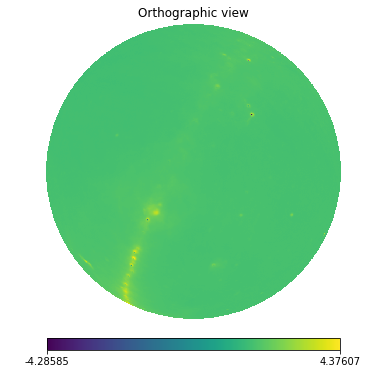

In [46]:
ov.generate(1400)
d = ov.view(logged=True)

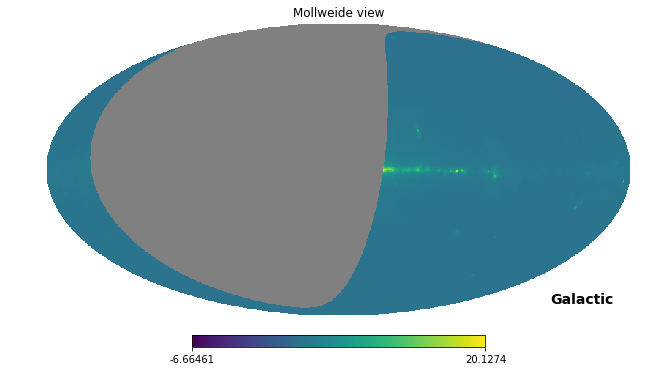

In [47]:
d = ov.view_observed_gsm()

In [51]:
gsm_2016 = GlobalSkyModel2016(freq_unit='MHz')
gsm_2008 = GlobalSkyModel(freq_unit='MHz')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


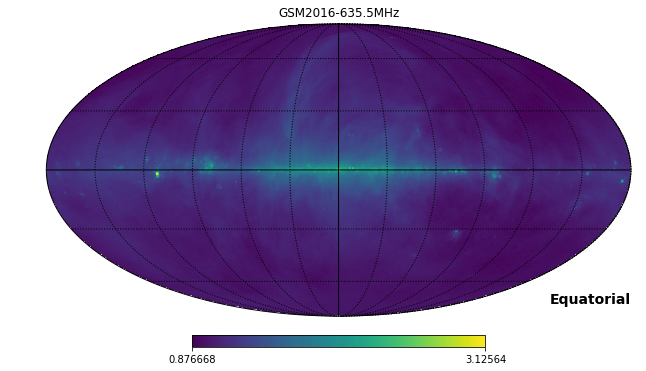

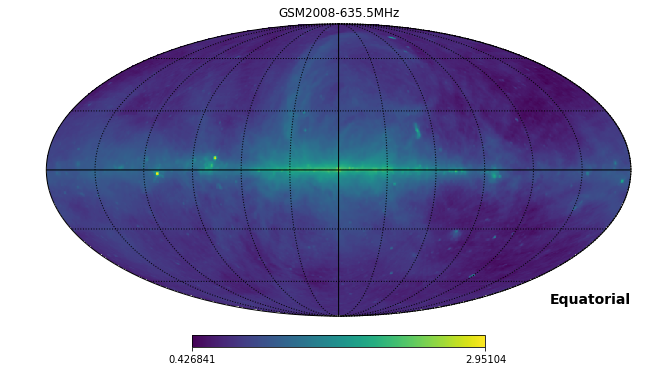

In [81]:
import healpy as hp
freq = 635.5 #MHz
maps_2016 = gsm_2016.generate(freqs=freq)
hp.mollview(np.log10(maps_2016), coord='C', title='GSM2016-{0}MHz'.format(freq))
hp.graticule()
maps_2008 = gsm_2008.generate(freqs=freq)
hp.mollview(np.log10(maps_2008), coord='C', title='GSM2008-{0}MHz'.format(freq))
hp.graticule()

In [89]:
maps_2008 /= maps_2008

In [90]:
maps_2008

array([1., 1., 1., ..., 1., 1., 1.])